In [26]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_boston
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split, cross_validate
from sklearn import metrics
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [2]:
house_dataset = load_boston() #  Загрузка дата сета

In [3]:
list(house_dataset) #  List methods

['data', 'target', 'feature_names', 'DESCR', 'filename', 'data_module']

## Description columns

In [4]:
print(house_dataset.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [5]:
house_dataset.feature_names #  Output features

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [6]:
house_dataset.target #  Price house

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 18.7, 16. , 22.2, 25. , 33. , 23.5,
       19.4, 22. , 17.4, 20.9, 24.2, 21.7, 22.8, 23.4, 24.1, 21.4, 20. ,
       20.8, 21.2, 20.3, 28. , 23.9, 24.8, 22.9, 23.9, 26.6, 22.5, 22.2,
       23.6, 28.7, 22.6, 22. , 22.9, 25. , 20.6, 28.4, 21.4, 38.7, 43.8,
       33.2, 27.5, 26.5, 18.6, 19.3, 20.1, 19.5, 19.5, 20.4, 19.8, 19.4,
       21.7, 22.8, 18.8, 18.7, 18.5, 18.3, 21.2, 19.2, 20.4, 19.3, 22. ,
       20.3, 20.5, 17.3, 18.8, 21.4, 15.7, 16.2, 18. , 14.3, 19.2, 19.6,
       23. , 18.4, 15.6, 18.1, 17.4, 17.1, 13.3, 17.8, 14. , 14.4, 13.4,
       15.6, 11.8, 13.8, 15.6, 14.6, 17.8, 15.4, 21

# Convert boston data set to DataFrame

In [7]:
#  Create DataFrame

house_data = pd.DataFrame(data=house_dataset.data, columns=house_dataset.feature_names)
house_data.to_csv('house_price.csv')
house_data['PRICE'] = house_dataset.target

In [8]:
house_data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [9]:
house_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  PRICE    506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


In [10]:
house_data.describe() #  Основные статистические показатели

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


<AxesSubplot:>

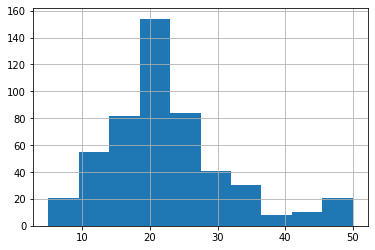

In [11]:
house_data['PRICE'].hist() #  Смотрим на распределение цен.

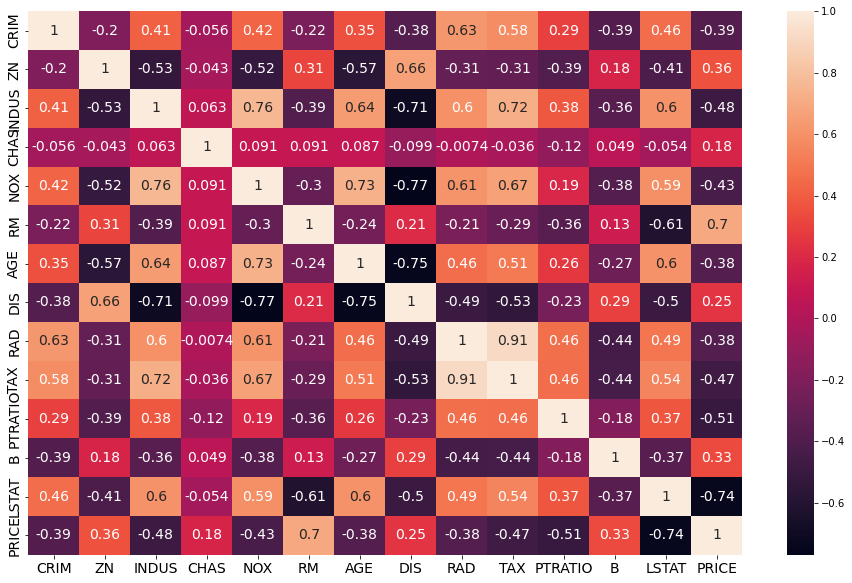

In [12]:
#  Корреляция между признаками

plt.figure(figsize=(16, 10))
sns.heatmap(house_data.corr(),annot=True ,annot_kws={'size': 14})
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

## Training and Test DataSet split

In [13]:
features = house_data.drop('PRICE', axis=1)
price = house_data['PRICE']


#  Разбиваем выборку на test and train
X_train, X_test, y_train, y_test = train_test_split(features, price, test_size=0.2, random_state=42) 

In [14]:
LinearModel = LinearRegression()
LinearModel.fit(X_train, y_train) #  Обучаем модель линейной регресии 

print(f'Train score: {LinearModel.score(X_train, y_train)}')
print(f'Test score: {LinearModel.score(X_test, y_test)}')

print(f'Intercept model: {LinearModel.intercept_}')

Train score: 0.7508856358979673
Test score: 0.6687594935356229
Intercept model: 30.24675099392308


## Оцениниваем распределение на регрессионной прямой

In [55]:
predict_price = LinearModel.predict(X_test)

In [56]:
#  Создаем DataFrame с пресказанными и реальными значениями.
#  Переименовываем столбцы для удобства

result_dataframe = pd.DataFrame(data=(np.array(y_test), predict_price)).T

result_dataframe = result_dataframe.rename(columns={
    0: 'True Price', 
    1: 'Predict Price'
})

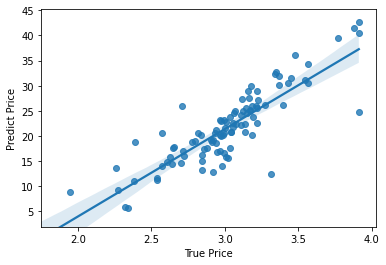

In [57]:
sns.regplot(
    x='True Price', y='Predict Price', 
    data=result_dataframe
)

plt.xlim(1.75)
plt.ylim(1.95)
plt.show()

## Ипользуем логарифмирование

In [54]:
features = house_data.drop('PRICE', axis=1)
price = np.log(house_data['PRICE'])

X_train, X_test, y_train, y_test = train_test_split(features, price, test_size=0.2, random_state=42)

In [51]:
LinearLogModel = LinearRegression()
LinearLogModel.fit(X_train, y_train)

LinearRegression()

In [52]:
#  Score увеличислся через логарифмирование.

print(f'Train model score: {LinearLogModel.score(X_train, y_train)}')
print(f'Test model score: {LinearLogModel.score(X_test, y_test)}')

print(f'Intercept: {LinearLogModel.intercept_}')

Train model score: 0.795714923175866
Test model score: 0.7462724975382701
Intercept: 3.8409203099175535


In [53]:
predict_price = LinearLogModel.predict(X_test)

## GridSearchCV

In [58]:
features = house_data.drop('PRICE', axis=1)
price = np.log(house_data['PRICE'])

X_train, X_test, y_train, y_test = train_test_split(features, price, test_size=0.2, random_state=42)

In [59]:
LinearLogModel = LinearRegression()
LinearLogModel.fit(X_train, y_train)

LinearRegression()

In [63]:
parameters = {'fit_intercept':[True, False], 'normalize':[True, False], 'copy_X':[True, False]}

best_linear_log_model = GridSearchCV(LinearLogModel,parameters, cv=5)
best_linear_log_model.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=LinearRegression(),
             param_grid={'copy_X': [True, False],
                         'fit_intercept': [True, False],
                         'normalize': [True, False]})

In [64]:
best_linear_log_model.best_params_ #  Лучшие параметры модели

{'copy_X': True, 'fit_intercept': True, 'normalize': False}

In [65]:
print(f'Train model score: {best_linear_log_model.score(X_train, y_train)}')
print(f'Test model score: {best_linear_log_model.score(X_test, y_test)}')

Train model score: 0.795714923175866
Test model score: 0.7462724975382701


## Строим прямую регрессии

In [66]:
#  Создаем DataFrame с пресказанными и реальными значениями.
#  Переименовываем столбцы для удобства

result_dataframe = pd.DataFrame(data=(np.array(y_test), predict_price)).T

result_dataframe = result_dataframe.rename(columns={
    0: 'True Price', 
    1: 'Predict Price'
})

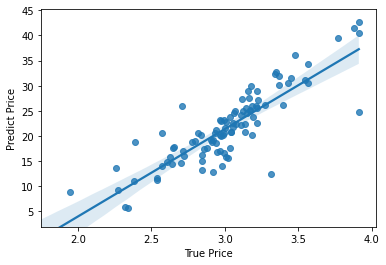

In [67]:
sns.regplot(
    x='True Price', y='Predict Price', 
    data=result_dataframe
)

plt.xlim(1.75)
plt.ylim(1.95)
plt.show()